In [100]:
from pathlib import Path
from collections import defaultdict, Counter
from pprint import pprint
import json
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from copy import deepcopy

In [2]:
org_vocab = set()
with open("/home/gaia_data/iida.h/BEIR/model/pubmed_abst/bert-base-uncased/mlm_model/raw/remove/30522/vocab.txt") as f:
    for line in f:
        v = line.split()[0]
        org_vocab.add(v)

In [3]:
def load_vocabs(file_path: Path, org_vocab: set):
    vocab_files = list(file_path.glob("**/vocab.txt"))
    # print(vocab_files)

    vocabs = {}
    for vocab_file in vocab_files:
        n_vocab = str(vocab_file).split("/")[-2]
        vocab = set()
        with open(vocab_file) as f:
            for line in f:
                v = line.split()[0]
                if v not in org_vocab:
                    vocab.add(v)
        vocabs[n_vocab] = vocab
    return vocabs
        

In [36]:
def calc_vocab_len_ave(vocabs):
    vocabs_len_ave = {}
    for n_vocab, vocab in vocabs.items():
        vocabs_len_ave[n_vocab] = (round(np.mean([len(v.strip("#")) for v in vocab]), 3), round(np.std([len(v) for v in vocab]), 3), len(vocab))
    return vocabs_len_ave

def len_tok_vocab(file_path: Path):
    vocab_files = list(file_path.glob("**/vocab.txt"))
    # print(vocab_files)

    vocabs = {}
    for vocab_file in vocab_files:
        n_vocab = str(vocab_file).split("/")[-2]
        vocab = set()
        with open(vocab_file) as f:
            for line in f:
                v = line.split()[0]
                vocab.add(v)
        vocabs[n_vocab] = vocab
    return calc_vocab_len_ave(vocabs)
   

In [37]:
pubmed_tk_vocabs_len_ave = len_tok_vocab(Path("/home/gaia_data/iida.h/BEIR/model/pubmed_abst/bert-base-uncased/init_model/raw/remove/"))
pprint(pubmed_tk_vocabs_len_ave)

{'30522': (6.095, 2.633, 30522),
 '33522': (6.214, 2.758, 33522),
 '36522': (6.298, 2.861, 36522),
 '39522': (6.376, 2.944, 39522),
 '42522': (6.454, 3.014, 42522),
 '45522': (6.531, 3.081, 45522),
 '48522': (6.611, 3.145, 48522),
 '51522': (6.692, 3.203, 51522),
 '54522': (6.758, 3.248, 54522),
 '57522': (6.785, 3.262, 57522),
 '60522': (6.804, 3.276, 60522),
 '63522': (6.822, 3.292, 63522),
 '66522': (6.827, 3.315, 66522),
 '69522': (6.796, 3.363, 69522),
 '71694': (6.823, 3.385, 71694),
 '71694_1': (6.823, 3.385, 71694),
 '73856': (6.847, 3.399, 73856)}


語彙を追加していくと、平均的な長さは増えていく

In [4]:
def analyze(root_path: Path, org_vocab: set):
    target_vocabs = load_vocabs(root_path, org_vocab)
    
    target_vocabs_len_ave = {}
    for k in sorted(target_vocabs.keys()):
        vocab = target_vocabs[k]
        target_vocabs_len_ave[k] = (round(np.mean([len(v.strip("#")) for v in vocab]), 3), round(np.std([len(v) for v in vocab]), 3), len(vocab))
        
    new_target_vocabs = {}
    prevs_vocab = set()
    for vocab in sorted(target_vocabs.keys()):
        new_target_vocab = target_vocabs[vocab] - prevs_vocab 
        if new_target_vocab:
            new_target_vocabs[vocab] = new_target_vocab
        prevs_vocab |= target_vocabs[vocab] 
    new_target_vocabs_len_ave = {}
    for k, vocab in new_target_vocabs.items():
        new_target_vocabs_len_ave[k] = (round(np.mean([len(v.strip("#")) for v in vocab if re.match("[a-z#]+$", v)]), 3), round(np.std([len(v) for v in vocab]),3), len([v for v in vocab if "#" not in v]))
        
    return (target_vocabs, new_target_vocabs, target_vocabs_len_ave, new_target_vocabs_len_ave)
    

In [5]:
pubmed_vocab, new_pubmed_vocab, pubmed_vocabs_len_ave, new_pubmed_vocabs_len_ave = analyze(Path("/home/gaia_data/iida.h/BEIR/model/pubmed_abst/bert-base-uncased/init_model/raw/remove/"), org_vocab)
pprint(pubmed_vocabs_len_ave)
pprint(new_pubmed_vocabs_len_ave)

{'30522': (nan, nan, 0),
 '33522': (7.43, 3.694, 3000),
 '36522': (7.328, 3.734, 6000),
 '39522': (7.328, 3.739, 9000),
 '42522': (7.366, 3.741, 12000),
 '45522': (7.419, 3.755, 15000),
 '48522': (7.485, 3.777, 18000),
 '51522': (7.56, 3.795, 21000),
 '54522': (7.6, 3.799, 24000),
 '57522': (7.565, 3.768, 27000),
 '60522': (7.525, 3.748, 30000),
 '63522': (7.494, 3.736, 33000),
 '66522': (7.448, 3.74, 36000),
 '69522': (7.345, 3.795, 39000),
 '71694': (7.363, 3.805, 41172),
 '71694_1': (7.363, 3.805, 41172),
 '73856': (7.376, 3.804, 43334)}
{'33522': (7.588, 3.694, 3000),
 '36522': (7.425, 3.77, 3004),
 '39522': (7.522, 3.738, 3038),
 '42522': (7.69, 3.704, 3110),
 '45522': (7.874, 3.781, 3087),
 '48522': (8.069, 3.82, 3127),
 '51522': (8.262, 3.83, 3127),
 '54522': (8.139, 3.771, 3135),
 '57522': (7.653, 3.538, 2827),
 '60522': (7.502, 3.6, 2838),
 '63522': (7.568, 3.656, 2857),
 '66522': (7.655, 3.8, 2895),
 '69522': (7.916, 4.218, 2969),
 '71694': (8.14, 3.955, 2174),
 '73856': (8.0

/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in do

In [50]:
def distribution_of_length(new_vocab):
    dist_vocab_len = {}
    for n_vocab, vocab in new_vocab.items():
        dist_vocab_len[n_vocab] = Counter([len(v.strip("##")) for v in vocab])
    return dist_vocab_len
        

/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:title={'center':'33522'}>,
       <AxesSubplot:title={'center':'36522'}>,
       <AxesSubplot:title={'center':'39522'}>,
       <AxesSubplot:title={'center':'42522'}>,
       <AxesSubplot:title={'center':'45522'}>,
       <AxesSubplot:title={'center':'48522'}>,
       <AxesSubplot:title={'center':'51522'}>,
       <AxesSubplot:title={'center':'54522'}>,
       <AxesSubplot:title={'center':'57522'}>,
       <AxesSubplot:title={'center':'60522'}>,
       <AxesSubplot:title={'center':'63522'}>,
       <AxesSubplot:title={'center':'66522'}>,
       <AxesSubplot:title={'center':'69522'}>,
       <AxesSubplot:title={'center':'71694'}>,
       <AxesSubplot:title={'center':'73856'}>], dtype=object)

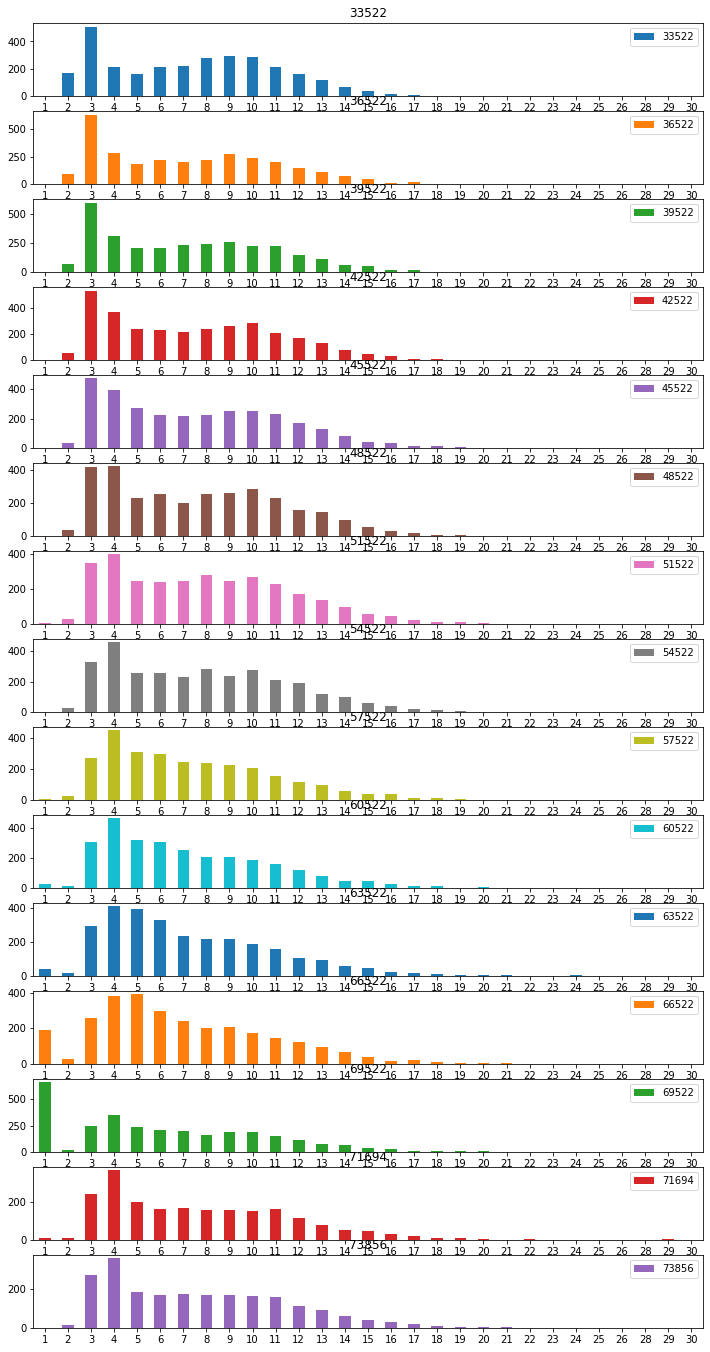

In [125]:
df_len_dist = pd.DataFrame(distribution_of_length(new_pubmed_vocab)).fillna(0).sort_index()
fig, ax = plt.subplots(figsize=(12, 24))
df_len_dist.plot.bar(rot=0, subplots=True, ax=ax)
# box plot

In [126]:
df_len_dist.idxmax()

33522    3
36522    3
39522    3
42522    3
45522    3
48522    4
51522    4
54522    4
57522    4
60522    4
63522    4
66522    5
69522    1
71694    4
73856    4
dtype: int64

In [127]:
df_len_dist

,33522,36522,39522,42522,45522,48522,51522,54522,57522,60522,63522,66522,69522,71694,73856
1,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,7.0,25.0,42.0,188.0,665.0,10.0,0.0
2,169.0,94.0,73.0,58.0,38.0,40.0,30.0,25.0,24.0,15.0,16.0,26.0,19.0,12.0,12.0
3,508.0,634.0,601.0,530.0,472.0,417.0,349.0,332.0,270.0,306.0,291.0,260.0,247.0,244.0,270.0
4,217.0,289.0,310.0,365.0,391.0,420.0,400.0,459.0,451.0,468.0,408.0,380.0,347.0,369.0,356.0
5,164.0,188.0,214.0,237.0,274.0,228.0,250.0,255.0,312.0,325.0,390.0,391.0,239.0,201.0,181.0
6,211.0,221.0,212.0,227.0,223.0,256.0,240.0,255.0,297.0,306.0,325.0,294.0,205.0,164.0,165.0
7,220.0,205.0,234.0,218.0,218.0,201.0,248.0,231.0,247.0,253.0,234.0,242.0,200.0,166.0,172.0
8,280.0,224.0,245.0,241.0,226.0,254.0,284.0,284.0,241.0,206.0,214.0,202.0,162.0,156.0,166.0
9,295.0,275.0,259.0,262.0,252.0,263.0,247.0,240.0,226.0,210.0,215.0,206.0,194.0,160.0,165.0
10,286.0,237.0,223.0,287.0,254.0,282.0,273.0,276.0,210.0,191.0,185.0,174.0,189.0,155.0,161.0


In [96]:
df_len_dist.loc[:14].sum(axis=0) / df_len_dist.sum(axis=0)

33522    0.971333
36522    0.967377
39522    0.962475
42522    0.965916
45522    0.960155
48522    0.956188
51522    0.947873
54522    0.952153
57522    0.958967
60522    0.958069
63522    0.958348
66522    0.963385
69522    0.967666
71694    0.941122
73856    0.951568
dtype: float64

In [89]:
df_len_dist.apply(lambda x: np.argsort(x)[::-1]+1, axis=0)

,33522,36522,39522,42522,45522,48522,51522,54522,57522,60522,63522,66522,69522,71694,73856
30,3,3,3,3,3,4,4,4,4,4,4,5,1,4,4
29,9,4,4,4,4,3,3,3,5,5,5,4,4,3,3
28,10,9,9,10,5,10,8,8,6,3,6,6,3,5,5
26,8,10,8,9,10,9,10,10,3,6,3,3,5,7,7
25,7,8,7,8,9,6,5,5,7,7,7,7,6,6,8
24,4,6,11,5,11,8,7,6,8,9,9,9,7,11,6
23,11,11,10,6,8,11,9,9,9,8,8,8,9,9,9
22,6,7,5,7,6,5,6,7,10,10,10,1,10,8,10
21,2,5,6,11,7,7,11,11,11,11,11,10,8,10,11
20,5,12,12,12,12,12,12,12,12,12,12,11,11,12,12


In [97]:
df_len_dist.idxmax(axis=1)

1     69522
2     33522
3     36522
4     60522
5     66522
6     63522
7     60522
8     51522
9     33522
10    42522
11    51522
12    54522
13    48522
14    54522
15    39522
16    51522
17    51522
18    45522
19    51522
20    71694
21    63522
22    48522
23    51522
24    63522
25    51522
26    51522
28    48522
29    71694
30    54522
dtype: object

In [109]:
pprint(new_pubmed_vocab["33522"])

{'a3',
 'a549',
 'aav',
 'aberrant',
 'aberrations',
 'abeta',
 'abiotic',
 'abl',
 'ablation',
 'abnormality',
 'abr',
 'abrogated',
 'abscess',
 'absorbance',
 'aca',
 'acceptor',
 'accumulating',
 'acet',
 'acetate',
 'acetic',
 'acetonitrile',
 'acetyl',
 'acetylation',
 'acetylcholine',
 'ach',
 'acidosis',
 'acl',
 'acp',
 'acr',
 'acs',
 'acth',
 'actin',
 'activates',
 'activating',
 'activator',
 'activators',
 'acuity',
 'acupuncture',
 'acutely',
 'acyl',
 'adc',
 'adduct',
 'adducts',
 'adenine',
 'adeno',
 'adenocarcinoma',
 'adenoma',
 'adenomas',
 'adenosine',
 'adenovirus',
 'adenylate',
 'adh',
 'adhd',
 'adherent',
 'adhesion',
 'adhesive',
 'adipocytes',
 'adiponectin',
 'adipose',
 'adjuvant',
 'adm',
 'adp',
 'adr',
 'adrenal',
 'adrenergic',
 'adrenoceptor',
 'adsorbed',
 'adsorption',
 'aer',
 'aerobic',
 'aerosol',
 'aeruginosa',
 'aff',
 'affective',
 'afferent',
 'afferents',
 'affinities',
 'afm',
 'afp',
 'aga',
 'agar',
 'agarose',
 'ageing',
 'aggregated',

In [106]:
pprint(new_pubmed_vocab["71694"])

{'a1298c',
 'a13',
 'a53t',
 'a59',
 'aanat',
 'aav9',
 'abattoirs',
 'abeta40',
 'abpc',
 'abre',
 'abutting',
 'acampros',
 'acamprosate',
 'acbp',
 'accorded',
 'acetoacetyl',
 'acetobacter',
 'acetylglucosaminyltransferase',
 'acetylhydrolase',
 'acetylmur',
 'acetylpenicillamine',
 'achondroplasia',
 'achromobacter',
 'acos',
 'acromion',
 'acss',
 'actinomycosis',
 'acto',
 'acut',
 'adamantyl',
 'addressable',
 'adenotons',
 'adipoq',
 'adk',
 'adrenocorticotrophic',
 'adrenomedullary',
 'advantaged',
 'aegilops',
 'aeroallergens',
 'afps',
 'ag8',
 'aggregative',
 'agriculturally',
 'agroecosystems',
 'aica',
 'aida',
 'ajs',
 'ajust',
 'aks',
 'akt3',
 'alameth',
 'alamethicin',
 'alanines',
 'alaskan',
 'algun',
 'alia',
 'alienation',
 'alimentation',
 'alix',
 'alkyltransferase',
 'allene',
 'alpha1b',
 'alphaviruses',
 'amadori',
 'amberlite',
 'ambr',
 'ambrox',
 'ambroxol',
 'aminobenzamide',
 'aminobutyrate',
 'aminocaproic',
 'aminoprop',
 'amitraz',
 'amls',
 'ammun',

In [102]:
subword_pairs = defaultdict(list)
for n_vocab, vocab in new_pubmed_vocab.items():
    for v in tqdm(vocab):
        for u in vocab:
            if u in v:
                s = v.replace(u, "##")
                if s in bert_tk.vocab:
                    subword_pairs[n_vocab].append((u, v))
                    
subword_pairs

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3004 [00:00<?, ?it/s]

  0%|          | 0/3038 [00:00<?, ?it/s]

  0%|          | 0/3110 [00:00<?, ?it/s]

  0%|          | 0/3087 [00:00<?, ?it/s]

  0%|          | 0/3127 [00:00<?, ?it/s]

  0%|          | 0/3127 [00:00<?, ?it/s]

  0%|          | 0/3135 [00:00<?, ?it/s]

  0%|          | 0/2827 [00:00<?, ?it/s]

  0%|          | 0/2838 [00:00<?, ?it/s]

  0%|          | 0/2857 [00:00<?, ?it/s]

  0%|          | 0/2895 [00:00<?, ?it/s]

  0%|          | 0/2969 [00:00<?, ?it/s]

  0%|          | 0/2174 [00:00<?, ?it/s]

  0%|          | 0/2168 [00:00<?, ?it/s]

defaultdict(list,
            {'33522': [('leuc', 'leucine'),
              ('leu', 'leucine'),
              ('elucidate', 'elucidated'),
              ('germ', 'germline'),
              ('genomic', 'genomics'),
              ('aneurysm', 'aneurysms'),
              ('statin', 'statins'),
              ('cd3', 'cd34'),
              ('cg', 'cgmp'),
              ('chr', 'chrom'),
              ('sulf', 'sulfide'),
              ('hel', 'helices'),
              ('proteomic', 'proteomics'),
              ('prote', 'proteomics'),
              ('nucle', 'nucleation'),
              ('modulate', 'modulated'),
              ('str', 'stra'),
              ('neutrophil', 'neutrophils'),
              ('chol', 'choline'),
              ('dm', 'dmso'),
              ('cro', 'crohn'),
              ('nac', 'nacl'),
              ('conformation', 'conformations'),
              ('angio', 'angiography'),
              ('ig', 'igm'),
              ('cytotoxic', 'cytotoxicity'),
              ('i

In [104]:
{k: len(v) for k, v in subword_pairs.items()}

{'33522': 647,
 '36522': 263,
 '39522': 198,
 '42522': 158,
 '45522': 111,
 '48522': 74,
 '51522': 57,
 '54522': 50,
 '57522': 54,
 '60522': 76,
 '63522': 64,
 '66522': 50,
 '69522': 31,
 '71694': 35,
 '73856': 25}

In [6]:
pubmed_raw_vocab, new_pubmed_raw_vocab, pubmed_raw_vocabs_len_ave, new_pubmed_raw_vocabs_len_ave = analyze(Path("/home/gaia_data/iida.h/BEIR/model/pubmed_abst_202310//bert-base-uncased/tokenizer//raw/raw/"), org_vocab)
pprint(pubmed_raw_vocabs_len_ave)
pprint(new_pubmed_raw_vocabs_len_ave)

{'30522': (nan, nan, 0),
 '33522': (8.569, 3.635, 3000),
 '36522': (8.637, 3.802, 6000),
 '39522': (8.556, 3.877, 9000),
 '42522': (8.492, 3.902, 12000),
 '45522': (8.548, 3.965, 15000),
 '48522': (8.613, 4.033, 18000),
 '51522': (8.66, 4.063, 21000),
 '54522': (8.682, 4.069, 24000),
 '57522': (8.676, 4.072, 27000),
 '60522': (8.535, 4.008, 30000),
 '63522': (8.503, 3.965, 33000),
 '66522': (8.517, 3.957, 36000),
 '69522': (8.605, 3.972, 39000),
 '72522': (8.774, 4.033, 42000),
 '74738': (9.023, 4.119, 44216),
 '74739': (9.023, 4.119, 44217),
 '75522': (6.87, 3.488, 45000)}
{'33522': (8.955, 3.635, 2948),
 '36522': (9.018, 3.959, 2838),
 '39522': (8.73, 4.019, 2803),
 '42522': (8.617, 3.964, 2788),
 '45522': (8.962, 4.158, 3019),
 '48522': (9.178, 4.221, 3082),
 '51522': (9.23, 4.238, 2686),
 '54522': (9.2, 4.089, 2615),
 '57522': (8.778, 4.053, 2663),
 '60522': (7.374, 3.205, 2330),
 '63522': (8.237, 3.41, 2842),
 '66522': (8.803, 3.737, 3140),
 '69522': (9.342, 3.945, 3527),
 '72522'

In [107]:
pprint(new_pubmed_raw_vocab['33522'])

{'")',
 '",',
 '".',
 '##000',
 '##acetate',
 '##acetic',
 '##aemia',
 '##aldehyde',
 '##amide',
 '##amin',
 '##amino',
 '##angi',
 '##aph',
 '##azine',
 '##azol',
 '##benzene',
 '##carb',
 '##cyt',
 '##degrees',
 '##ectomy',
 '##emic',
 '##enic',
 '##ethyl',
 '##glyc',
 '##glycine',
 '##h2',
 '##hydro',
 '##idin',
 '##idine',
 '##meth',
 '##methyl',
 '##nit',
 '##o2',
 '##ocyte',
 '##ogenesis',
 '##ogram',
 '##ologic',
 '##olytic',
 '##onium',
 '##onyl',
 '##oph',
 '##opo',
 '##osph',
 '##osyl',
 '##oxy',
 '##oxyl',
 '##oyl',
 '##phen',
 '##phenyl',
 '##phosphate',
 '##prop',
 '##tetra',
 '##thio',
 '##transferase',
 '##uric',
 '%)',
 '%),',
 '%).',
 '%,',
 '%.',
 '%;',
 "')",
 "')-",
 "',",
 "'-",
 "'.",
 "':",
 '("',
 '((',
 '(+',
 '(+)',
 '(+)-',
 '(+/-',
 '(+/-)-',
 '(-',
 '(-)',
 '(-)-',
 '(--)-',
 '(=',
 '([',
 ')(',
 '))',
 ')).',
 '),',
 ')-',
 ')--',
 ').',
 ')/',
 '):',
 ');',
 ')]',
 '+)',
 '+),',
 '+)-',
 '+).',
 '++',
 '++,',
 '++-',
 '+,',
 '+-',
 '+.',
 '+/',
 '+/-',
 '

In [110]:
pprint(new_pubmed_raw_vocab['66522'])

{'""',
 '##207',
 '##aage',
 '##abeling',
 '##acetylpyridine',
 '##acharides',
 '##acks',
 '##acthose',
 '##actolol',
 '##adiene',
 '##aftsverb',
 '##alan',
 '##alanylalanine',
 '##alcinosis',
 '##alinity',
 '##alkylamih',
 '##aloides',
 '##anolone',
 '##antoin',
 '##arcinoma',
 '##arially',
 '##asparagines',
 '##aston',
 '##atidylcholines',
 '##atives',
 '##aturation',
 '##azaki',
 '##azinylthiocarbonyl',
 '##boski',
 '##braically',
 '##cerated',
 '##cheibe',
 '##chnoid',
 '##cified',
 '##constriction',
 '##dix',
 '##edin',
 '##enberger',
 '##enck',
 '##endorf',
 '##enser',
 '##entar',
 '##ercible',
 '##erocha',
 '##estos',
 '##ethylmethacrylate',
 '##etically',
 '##etides',
 '##eul',
 '##fluoroethane',
 '##hinia',
 '##hinolaryngeal',
 '##hipmen',
 '##hydria',
 '##iazid',
 '##icephalus',
 '##idonoyl',
 '##igravida',
 '##ilazocarboxypeptidase',
 '##ilinogen',
 '##illance',
 '##iment',
 '##inaemia',
 '##insulphonate',
 '##isons',
 '##itrant',
 '##keitsinv',
 '##losic',
 '##mea',
 '##mos

In [117]:
sorted(pubmed_raw_vocab["66522"] - pubmed_vocab["66522"])

['")',
 '"),',
 '").',
 '");',
 '",',
 '"-',
 '"--',
 '".',
 '":',
 '";',
 '##(-',
 '##),',
 '##).',
 '##+)',
 '##+,',
 '##+/-)-',
 '##-(',
 '##--',
 '##/([',
 '##/+)',
 '##/[',
 '##000',
 '##02',
 '##03',
 '##04',
 '##0phosphate',
 '##101',
 '##128',
 '##130',
 '##14c',
 '##16p',
 '##1hg',
 '##1r2',
 '##221',
 '##285',
 '##2c',
 '##2ch2',
 '##2h',
 '##2n',
 '##2o',
 '##2o7',
 '##2t',
 '##313',
 '##390',
 '##393',
 '##3h',
 '##3l2',
 '##410',
 '##450cam',
 '##480',
 '##4a',
 '##4c51',
 '##4l',
 '##5ilv',
 '##5l',
 '##5u',
 '##5um',
 '##67',
 '##68',
 '##69',
 '##71',
 '##72',
 '##74',
 '##76',
 '##77',
 '##78',
 '##79',
 '##798',
 '##7g',
 '##7tb',
 '##8000',
 '##81',
 '##82',
 '##83',
 '##84',
 '##87',
 '##88',
 '##8b',
 '##8k',
 '##8l2',
 '##8tg2',
 '##92',
 '##94',
 '##95',
 '##98',
 '##99',
 '##9min',
 '##9x',
 '##[(',
 '##a2',
 '##aam1',
 '##aas',
 '##aated',
 '##abdom',
 '##abel',
 '##abelling',
 '##abetogenic',
 '##abil',
 '##abilities',
 '##abilized',
 '##abilizing',
 '##abilty

In [122]:
num_vocab = defaultdict(list)
for n_vocab, vocab in new_pubmed_vocab.items():
    for v in vocab:
        if re.search("[0-9]", v):
             num_vocab[n_vocab].append(v)
{k: len(v) for k, v in num_vocab.items()}

{'33522': 91,
 '36522': 135,
 '39522': 149,
 '42522': 169,
 '45522': 208,
 '48522': 206,
 '51522': 197,
 '54522': 191,
 '57522': 179,
 '60522': 163,
 '63522': 170,
 '66522': 190,
 '69522': 195,
 '71694': 197,
 '73856': 207}

/home/iida.h/work/IR/SPLADE_VOCAB/.venv_20230727/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:title={'center':'33522'}>,
       <AxesSubplot:title={'center':'36522'}>,
       <AxesSubplot:title={'center':'39522'}>,
       <AxesSubplot:title={'center':'42522'}>,
       <AxesSubplot:title={'center':'45522'}>,
       <AxesSubplot:title={'center':'48522'}>,
       <AxesSubplot:title={'center':'51522'}>,
       <AxesSubplot:title={'center':'54522'}>,
       <AxesSubplot:title={'center':'57522'}>,
       <AxesSubplot:title={'center':'60522'}>,
       <AxesSubplot:title={'center':'63522'}>,
       <AxesSubplot:title={'center':'66522'}>,
       <AxesSubplot:title={'center':'69522'}>,
       <AxesSubplot:title={'center':'72522'}>,
       <AxesSubplot:title={'center':'74738'}>,
       <AxesSubplot:title={'center':'74739'}>,
       <AxesSubplot:title={'center':'75522'}>], dtype=object)

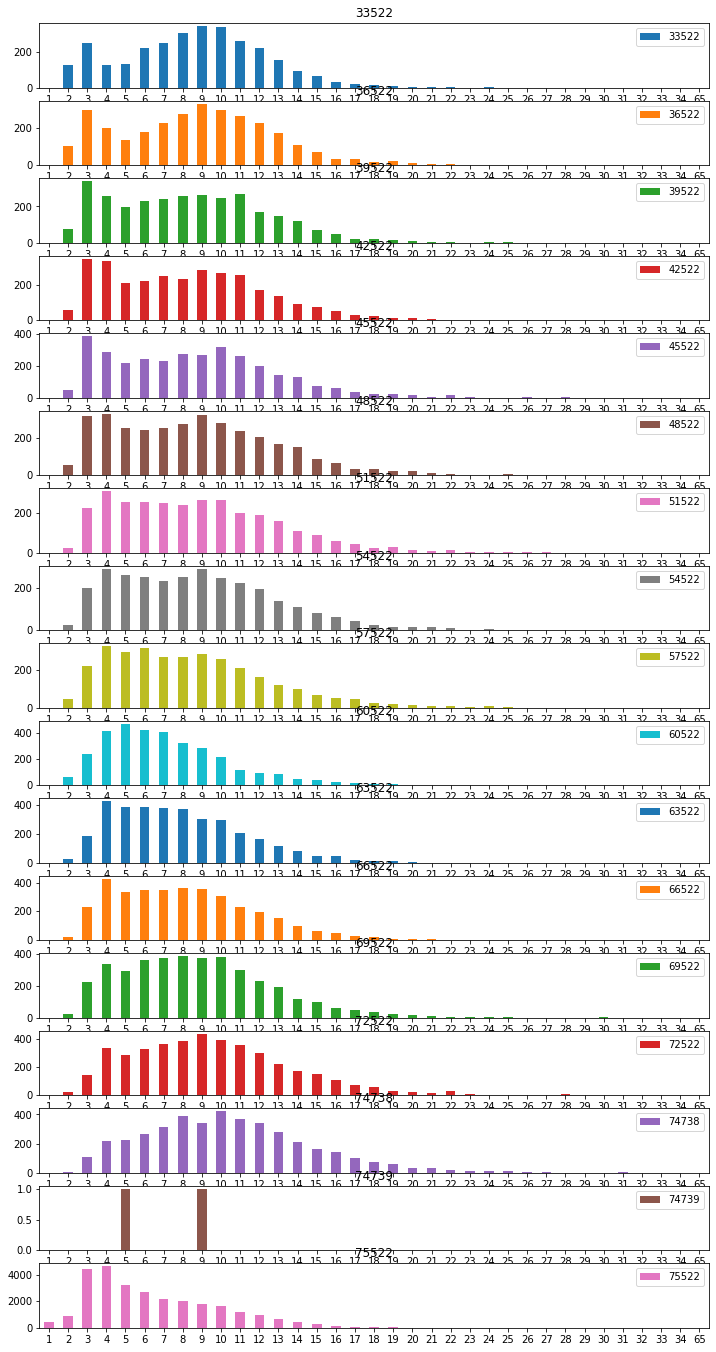

In [123]:
df_raw_len_dist = pd.DataFrame(distribution_of_length(new_pubmed_raw_vocab)).fillna(0).sort_index()
fig, ax = plt.subplots(figsize=(12, 24))
df_raw_len_dist.plot.bar(rot=0, subplots=True, ax=ax)
# box plot

In [124]:
df_raw_len_dist

,33522,36522,39522,42522,45522,48522,51522,54522,57522,60522,63522,66522,69522,72522,74738,74739,75522
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.0
2,126.0,102.0,75.0,55.0,47.0,53.0,24.0,27.0,48.0,66.0,28.0,26.0,23.0,20.0,6.0,0.0,866.0
3,250.0,297.0,339.0,345.0,384.0,323.0,226.0,200.0,222.0,238.0,187.0,232.0,222.0,143.0,105.0,0.0,4470.0
4,126.0,197.0,260.0,330.0,287.0,333.0,310.0,286.0,327.0,413.0,426.0,426.0,334.0,338.0,219.0,0.0,4658.0
5,134.0,137.0,198.0,207.0,218.0,257.0,254.0,258.0,299.0,469.0,386.0,337.0,292.0,287.0,223.0,1.0,3211.0
6,226.0,179.0,229.0,222.0,240.0,244.0,258.0,248.0,320.0,418.0,386.0,351.0,362.0,327.0,268.0,0.0,2710.0
7,254.0,223.0,241.0,246.0,230.0,256.0,253.0,229.0,269.0,405.0,377.0,346.0,374.0,368.0,311.0,0.0,2212.0
8,307.0,273.0,256.0,234.0,275.0,276.0,243.0,248.0,272.0,326.0,369.0,363.0,385.0,388.0,393.0,0.0,2053.0
9,347.0,328.0,264.0,281.0,270.0,326.0,266.0,288.0,286.0,283.0,306.0,355.0,374.0,438.0,345.0,1.0,1765.0
10,340.0,293.0,247.0,264.0,317.0,282.0,264.0,244.0,257.0,216.0,297.0,310.0,382.0,393.0,422.0,0.0,1630.0


In [108]:
subword_raw_pairs = defaultdict(list)
for n_vocab, vocab in new_pubmed_raw_vocab.items():
    for v in tqdm(vocab):
        for u in vocab:
            if u in v:
                s = v.replace(u, "##")
                if s in bert_tk.vocab or s in vocab:
                    subword_raw_pairs[n_vocab].append((u, v))
                    
subword_raw_pairs

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3002 [00:00<?, ?it/s]

  0%|          | 0/3022 [00:00<?, ?it/s]

  0%|          | 0/3053 [00:00<?, ?it/s]

  0%|          | 0/3252 [00:00<?, ?it/s]

  0%|          | 0/3426 [00:00<?, ?it/s]

  0%|          | 0/3066 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/3161 [00:00<?, ?it/s]

  0%|          | 0/3280 [00:00<?, ?it/s]

  0%|          | 0/3478 [00:00<?, ?it/s]

  0%|          | 0/3632 [00:00<?, ?it/s]

  0%|          | 0/3913 [00:00<?, ?it/s]

  0%|          | 0/4285 [00:00<?, ?it/s]

  0%|          | 0/4166 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/27945 [00:00<?, ?it/s]

defaultdict(list,
            {'33522': [('leu', 'leucine'),
              ('elucidate', 'elucidated'),
              ('prostaglandin', 'prostaglandins'),
              ('dimer', 'dimeric'),
              ('aneurysm', 'aneurysms'),
              ('dissociate', 'dissociated'),
              ('bronchi', 'bronchitis'),
              ('+)', '+)-'),
              ('str', 'stra'),
              ('neutrophil', 'neutrophils'),
              ('ortho', 'orthophosphate'),
              ('cofactor', 'cofactors'),
              ('pn', 'pnp'),
              ('pha', 'phages'),
              ('phage', 'phages'),
              ('conformation', 'conformations'),
              ('angi', 'angiography'),
              ('ig', 'igm'),
              ('cytotoxic', 'cytotoxicity'),
              ('(-', '(-)'),
              ('phosphoryl', 'phosphorylation'),
              ('##phen', '##phenyl'),
              ('neuro', 'neurotic'),
              ('endo', 'endoscopic'),
              ('iu', 'iud'),
              

In [7]:
sci_vocab, new_sci_vocab, sci_vocabs_len_ave, new_sci_vocabs_len_ave = analyze(Path("/home/gaia_data/iida.h/BEIR/model/S2ORC//bert-base-uncased/init_model/raw/remove/"), org_vocab)
pprint(sci_vocabs_len_ave)
pprint(new_sci_vocabs_len_ave)

{'30522': (nan, nan, 0),
 '33522': (7.014, 3.652, 3000),
 '36522': (7.03, 3.604, 6000),
 '39522': (7.15, 3.615, 9000),
 '42522': (7.257, 3.626, 12000),
 '45522': (7.362, 3.635, 15000),
 '48522': (7.301, 3.597, 18000),
 '51522': (7.211, 3.574, 21000),
 '54522': (7.078, 3.627, 24000),
 '57522': (6.901, 3.724, 27000),
 '60522': (6.78, 3.804, 30000),
 '62783': (6.787, 3.808, 32261),
 '64872': (6.83, 3.808, 34350),
 '67000': (6.87, 3.811, 36478),
 '69156': (6.908, 3.804, 38634),
 '71347': (6.942, 3.797, 40825)}
{'33522': (7.167, 3.652, 3000),
 '36522': (7.151, 3.55, 3023),
 '39522': (7.472, 3.596, 3099),
 '42522': (7.7, 3.603, 3105),
 '45522': (7.944, 3.598, 3129),
 '48522': (7.306, 3.418, 2880),
 '51522': (7.163, 3.436, 2879),
 '54522': (7.335, 3.886, 2924),
 '57522': (7.657, 4.171, 2980),
 '60522': (7.856, 4.306, 2993),
 '62783': (7.627, 3.859, 2262),
 '64872': (7.771, 3.744, 2095),
 '67000': (7.809, 3.796, 2129),
 '69156': (7.812, 3.625, 2157),
 '71347': (7.849, 3.623, 2194)}


In [8]:
sci_raw_vocab, new_sci_raw_vocab, sci_raw_vocabs_len_ave, new_sci_raw_vocabs_len_ave = analyze(Path("/home/gaia_data/iida.h/BEIR/model/S2ORC_202310/bert-base-uncased/tokenizer/raw/raw/"), org_vocab)
pprint(sci_raw_vocabs_len_ave)
pprint(new_sci_raw_vocabs_len_ave)

{'30522': (nan, nan, 0),
 '33522': (6.503, 3.476, 3000),
 '36522': (6.648, 3.479, 6000),
 '39522': (6.728, 3.492, 9000),
 '42522': (6.822, 3.495, 12000),
 '45522': (6.906, 3.515, 15000),
 '48522': (6.973, 3.521, 18000),
 '51522': (6.996, 3.53, 21000),
 '54522': (6.947, 3.51, 24000),
 '57522': (6.92, 3.497, 27000),
 '60522': (6.888, 3.482, 30000),
 '63522': (6.874, 3.475, 33000),
 '66522': (6.867, 3.484, 36000),
 '69522': (6.868, 3.482, 39000),
 '72522': (6.867, 3.481, 42000),
 '75522': (6.87, 3.488, 45000)}
{'33522': (6.845, 3.476, 2665),
 '36522': (6.984, 3.461, 2679),
 '39522': (7.106, 3.465, 2731),
 '42522': (7.285, 3.436, 2743),
 '45522': (7.527, 3.495, 2784),
 '48522': (7.625, 3.458, 2755),
 '51522': (7.568, 3.519, 2711),
 '54522': (7.023, 3.35, 2334),
 '57522': (7.171, 3.385, 2349),
 '60522': (7.113, 3.336, 2302),
 '63522': (7.297, 3.419, 2341),
 '66522': (7.193, 3.607, 2313),
 '69522': (7.354, 3.449, 2259),
 '72522': (7.328, 3.649, 2294),
 '75522': (7.455, 3.59, 2307)}


In [9]:
from transformers import AutoTokenizer
from collections import Counter

2023-10-26 12:24:09.415293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-26 12:24:09.415311: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [118]:
pubmed_tk = AutoTokenizer.from_pretrained("/home/gaia_data/iida.h/BEIR/model/pubmed_abst/bert-base-uncased/init_model/raw/remove/71694/")
pubmed_freq = Counter()
with open("/home/gaia_data/iida.h/corpus/pubmed/pubmed_abst_clean.txt") as f:
    for i, line in enumerate(f):
        pubmed_freq.update(pubmed_tk.tokenize(line))
pubmed_freq[pubmed_tk.unk_token] 

41831

In [120]:
pubmed_freq["afps"]

1319

In [207]:
pubmed_raw_tk = AutoTokenizer.from_pretrained("/home/gaia_data/iida.h/BEIR/model/pubmed_abst_202310//bert-base-uncased/tokenizer/raw/raw/74738/")
pubmed_raw_freq = Counter()
with open("/home/gaia_data/iida.h/pubmed/pubmed_abst_clean.txt") as f:
    for i, line in enumerate(f):
        pubmed_raw_freq.update(pubmed_tk.tokenize(line))
pubmed_raw_freq[pubmed_tk.unk_token] 

41831

In [105]:
bert_tk = AutoTokenizer.from_pretrained("bert-base-uncased")
pubmed_bert_freq = Counter()
with open("/home/gaia_data/iida.h/pubmed/pubmed_abst_clean.txt") as f:
    for i, line in enumerate(f):
        pubmed_bert_freq.update(bert_tk.tokenize(line))
pubmed_bert_freq[bert_tk.unk_token]

Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


In [208]:
pprint(pubmed_freq[pubmed_tk.unk_token])
pprint(pubmed_raw_freq[pubmed_raw_tk.unk_token])
pprint(pubmed_bert_freq[bert_tk.unk_token])

41831
41831
181493


In [133]:
for v in ["cancer", "phytate", "phyto", "carcinoma", "treatment", "ph", "help", "for", "drug", "treatments", "##s", "##yt", "cure", "phos", "used", "treat", "use", "benefit", "dose", "is"]:
    for vocab, vocabs in new_pubmed_vocab.items():
        if v in vocabs:
            print(v, vocab)

phytate 45522
phyto 33522
carcinoma 33522
phos 42522


In [19]:
for vocab, vocabs in new_pubmed_vocab.items():
    if "amnesic" in vocabs:
        print(vocab)
    if "phytate" in vocabs:
        print(vocab)

45522
51522


In [16]:
bert_tk = AutoTokenizer.from_pretrained("bert-base-uncased")
print(bert_tk.tokenize("amnesia"))
bert_tk.tokenize("amnesic")

['amnesia']


['am', '##nes', '##ic']

In [22]:
pubmed_tk.tokenize("phytate")

['phytate']

In [202]:
each_vocab_freq_in_pubmed = {}
for vocab in new_pubmed_vocab:
    each_vocab_freq_in_pubmed[vocab] = np.mean([pubmed_freq[v] for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_freq_in_pubmed)

{'33522': 62716.43666666667,
 '36522': 16472.445739014645,
 '39522': 9715.674456879526,
 '42522': 6685.209646302251,
 '45522': 4993.705539358601,
 '48522': 3875.0709945634794,
 '51522': 3120.7998081228016,
 '54522': 2597.49346092504,
 '57522': 2111.2058719490624,
 '60522': 1788.3417899929527,
 '63522': 1495.8582429121457,
 '66522': 1336.7354058721935,
 '69522': 1192.7147187605253,
 '71694': 1511.9687212511499,
 '73856': 0.0}


In [232]:
each_vocab_prob_in_pubmed = {}
all_freq_in_pubmed = sum(pubmed_freq.values())
for vocab in new_pubmed_vocab:
    each_vocab_prob_in_pubmed[vocab] = np.mean([pubmed_freq[v] / all_freq_in_pubmed for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_prob_in_pubmed)

{'33522': 1.9015513080129693e-05,
 '36522': 4.9944165207721415e-06,
 '39522': 2.945775374627862e-06,
 '42522': 2.0269437842637263e-06,
 '45522': 1.51408271976107e-06,
 '48522': 1.1749146970066437e-06,
 '51522': 9.462210024340567e-07,
 '54522': 7.87555440119947e-07,
 '57522': 6.401139000652303e-07,
 '60522': 5.422220793584661e-07,
 '63522': 4.5354158329013896e-07,
 '66522': 4.0529581950157303e-07,
 '69522': 3.616290009586638e-07,
 '71694': 4.5842625193307716e-07,
 '73856': 0.0}


In [111]:
s2orc_tk = AutoTokenizer.from_pretrained("/home/gaia_data/iida.h/BEIR/model/S2ORC//bert-base-uncased/init_model/raw/remove/62783/")
s2orc_freq = Counter()
with open("/home/gaia_data/iida.h/S2ORC/20200705v1/abst_txt/s2orc_abst_clean.txt") as f:
    for i, line in enumerate(f):
        s2orc_freq.update(pubmed_tk.tokenize(line))
s2orc_freq[pubmed_tk.unk_token] 

676170

In [114]:
s2orc_raw_tk = AutoTokenizer.from_pretrained("/home/gaia_data/iida.h/BEIR/model/s2orc_abst/tokenizer/raw/raw/59592/")
s2orc_raw_freq = Counter()
with open("/home/gaia_data/iida.h/S2ORC/20200705v1/abst_txt/s2orc_abst_clean.txt") as f:
    for i, line in enumerate(f):
        s2orc_raw_freq.update(pubmed_tk.tokenize(line))
s2orc_raw_freq[pubmed_tk.unk_token] 

676170

In [115]:
s2orc_bert_freq = Counter()
with open("/home/gaia_data/iida.h/S2ORC/20200705v1/abst_txt/s2orc_abst_clean.txt") as f:
    for i, line in enumerate(f):
        s2orc_bert_freq.update(bert_tk.tokenize(line))
s2orc_bert_freq[pubmed_tk.unk_token] 

1134425

In [197]:
pprint(sorted([v for v in new_sci_raw_vocab["33522"] if re.match("[a-z]+$", v)]))

['aav',
 'abelian',
 'aberrant',
 'aberrations',
 'abiotic',
 'ablation',
 'abnormality',
 'abscess',
 'abundances',
 'accelerometer',
 'acceptability',
 'acceptor',
 'accessions',
 'accretion',
 'accumulating',
 'acetate',
 'acetic',
 'acetyl',
 'acetylation',
 'acetylcholine',
 'achievable',
 'achieves',
 'activates',
 'activating',
 'activator',
 'actuator',
 'actuators',
 'acuity',
 'acupuncture',
 'acyl',
 'additives',
 'adenocarcinoma',
 'adenoma',
 'adenosine',
 'adenovirus',
 'adhd',
 'adhesion',
 'adhesive',
 'adiabatic',
 'adipocytes',
 'adiponectin',
 'adipose',
 'adiposity',
 'adjoint',
 'adjuvant',
 'adp',
 'adrenergic',
 'adsorbed',
 'adsorbent',
 'adsorption',
 'advantageous',
 'adversarial',
 'adversely',
 'aerobic',
 'aerosol',
 'aeruginosa',
 'affective',
 'afferent',
 'affine',
 'afm',
 'ageing',
 'aggregated',
 'aggregates',
 'alanine',
 'albicans',
 'albumin',
 'aldosterone',
 'algal',
 'algebras',
 'algorithmic',
 'alkaline',
 'alkyl',
 'allele',
 'alleles',
 'all

In [198]:
pprint(sorted([v for v in new_sci_raw_vocab["59592"] if re.match("[a-z]+$", v)]))

['aai',
 'abductor',
 'abide',
 'abpm',
 'absorptions',
 'abstinent',
 'abstracting',
 'accommodative',
 'accumulator',
 'acdf',
 'acetazolamide',
 'acetylsal',
 'acini',
 'aconit',
 'acpa',
 'acrosomal',
 'actigraphy',
 'actinic',
 'acule',
 'addictions',
 'adenosylmethionine',
 'adhesins',
 'adrenomedullin',
 'adsorbing',
 'adsorptive',
 'advected',
 'adventitia',
 'aecopd',
 'aee',
 'aerosolized',
 'afatinib',
 'aflibercept',
 'africana',
 'aftereffects',
 'agouti',
 'aie',
 'albumen',
 'algebro',
 'alienation',
 'aliment',
 'alizarin',
 'allocates',
 'allogenic',
 'allometry',
 'allozyme',
 'aloha',
 'alphabets',
 'alternated',
 'amastigotes',
 'ambivalence',
 'ambivalent',
 'ameloblastoma',
 'amides',
 'aminopropyl',
 'amphipod',
 'amphipods',
 'anabaena',
 'anaesthetics',
 'analogical',
 'analogously',
 'anesthesiology',
 'angiographically',
 'angiomy',
 'angustifolia',
 'annuum',
 'anodization',
 'antero',
 'anthracnose',
 'anthracyclines',
 'anthraquinone',
 'anticyclonic',
 'a

# Source

In [249]:
def count_tk(path_file, tk, is_json=True):
    freq = Counter()
    with path_file.open() as fIn:
        for line in fIn:
            if is_json:
                jline = json.loads(line)
                try:
                    text = jline["title"] + " " + jline["text"]
                except KeyError:
                    continue
            else:
                text = line
            freq.update(tk.tokenize(text))
    return freq
    
from concurrent.futures import ProcessPoolExecutor
from functools import partial

wiki_pbtk_freq = Counter()
wiki_path = Path("/home/gaia_data/iida.h/corpus/wikipedia/enwiki-extracted/")
wiki_files = list(wiki_path.glob("**/wiki*"))

pubmed_count_tk = partial(count_tk, tk=pubmed_tk, is_json=True)

with ProcessPoolExecutor(max_workers=8) as executor:
    futures = list(tqdm(executor.map(pubmed_count_tk, wiki_files), total=len(wiki_files)))
    for fut in futures:
        wiki_pbtk_freq.update(fut)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/18733 [00:00<?, ?it/s]

In [271]:
with open("dump/wiki_count.json", "w") as f:
    json.dump(wiki_pbtk_freq, f)


In [234]:
each_vocab_freq_in_wiki_pbtk = {}
for vocab in new_pubmed_vocab:
    each_vocab_freq_in_wiki_pbtk[vocab] = np.mean([wiki_pbtk_freq[v] for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_freq_in_wiki_pbtk)

{'33522': 33410.202,
 '36522': 27421.536617842878,
 '39522': 8641.477946017116,
 '42522': 7374.104180064309,
 '45522': 6120.38224813735,
 '48522': 5158.724656220019,
 '51522': 5403.175567636713,
 '54522': 3995.7237639553427,
 '57522': 12700.505129112133,
 '60522': 36365.47921071177,
 '63522': 3474.308715435772,
 '66522': 15537.06183074266,
 '69522': 3246.8285618053214,
 '71694': 4725.703771849126,
 '73856': 0.0}


In [236]:
each_vocab_prob_in_wiki_pbtk = {}
all_wiki_pbtk_freq = sum(wiki_pbtk_freq.values())
for vocab in new_pubmed_vocab:
    each_vocab_prob_in_wiki_pbtk[vocab] = np.mean([wiki_pbtk_freq[v] / all_wiki_pbtk_freq for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_prob_in_wiki_pbtk)

{'33522': 3.193414075375156e-06,
 '36522': 2.621005434323165e-06,
 '39522': 8.259697832672503e-07,
 '42522': 7.048316583629196e-07,
 '45522': 5.849984031188453e-07,
 '48522': 4.930812429137026e-07,
 '51522': 5.164463510102162e-07,
 '54522': 3.819192864839904e-07,
 '57522': 1.2139397374395114e-06,
 '60522': 3.4758853948039454e-06,
 '63522': 3.320813910095836e-07,
 '66522': 1.485063512644063e-06,
 '69522': 3.103383819588755e-07,
 '71694': 4.5169223882802215e-07,
 '73856': 0.0}


In [257]:
gten_pbtk_freq = Counter()
gten_path = Path("/home/gaia_data/iida.h/corpus/gutenberg/data/text/")
gten_files = list(gten_path.glob("*_text.txt"))

pubmed_count_tk = partial(count_tk, tk=pubmed_tk, is_json=False)

with ProcessPoolExecutor(max_workers=8) as executor:
    futures = list(tqdm(executor.map(pubmed_count_tk, gten_files), total=len(gten_files)))
    for fut in futures:
        gten_pbtk_freq.update(fut)
    del futures

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/70293 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [268]:
with open("dump/gten_freq.json", "w") as f:
    json.dump(gten_pbtk_freq, f)

In [258]:
each_vocab_prob_in_gten_pbtk = {}
all_gten_pbtk_freq = sum(gten_pbtk_freq.values())
for vocab in new_pubmed_vocab:
    each_vocab_prob_in_gten_pbtk[vocab] = np.mean([gten_pbtk_freq[v] / all_gten_pbtk_freq for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_prob_in_gten_pbtk)

{'33522': 3.0080273217409117e-06,
 '36522': 2.6555357036028107e-06,
 '39522': 2.0150140192849655e-06,
 '42522': 1.4623842427027777e-06,
 '45522': 1.2283331146074103e-06,
 '48522': 1.039190643734079e-06,
 '51522': 9.756658927820128e-07,
 '54522': 8.844781436760293e-07,
 '57522': 1.1769777621574881e-06,
 '60522': 1.111637913434324e-06,
 '63522': 8.164526987798291e-07,
 '66522': 7.428412630434282e-07,
 '69522': 9.044759261128119e-07,
 '71694': 7.719764341080966e-07,
 '73856': 0.0}


In [262]:
source_pbtk_freq = deepcopy(wiki_pbtk_freq)
source_pbtk_freq.update(gten_pbtk_freq)

each_vocab_prob_in_source_pbtk = {}
all_source_pbtk_freq = sum(source_pbtk_freq.values())
for vocab in new_pubmed_vocab:
    each_vocab_prob_in_source_pbtk[vocab] = np.mean([source_pbtk_freq[v] / all_source_pbtk_freq for v in new_pubmed_vocab[vocab]])
pprint(each_vocab_prob_in_source_pbtk)

{'33522': 2.862918044311414e-06,
 '36522': 2.7224582610831103e-06,
 '39522': 1.6600214222647323e-06,
 '42522': 1.2227886773696334e-06,
 '45522': 1.0185567038215714e-06,
 '48522': 8.790547126754667e-07,
 '51522': 8.06497937283571e-07,
 '54522': 7.461767462969747e-07,
 '57522': 1.1474732217205216e-06,
 '60522': 9.012488993100112e-07,
 '63522': 6.84177005952984e-07,
 '66522': 5.917029695241617e-07,
 '69522': 6.923646885346061e-07,
 '71694': 6.481024458993444e-07,
 '73856': 0.0}


In [273]:
with open("dump/source_freq.json", "w") as f:
    json.dump(source_pbtk_freq, f)
    

In [ ]:
wiki_bert_freq = Counter()
bert_count_tk = partial(count_tk, tk=pubmed_tk)

with ProcessPoolExecutor(max_workers=8) as executor:
    futures = list(tqdm(executor.map(bert_count_tk, wiki_files), total=len(wiki_files)))
    for fut in futures:
        wiki_bert_freq.update(fut.result())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/18733 [00:00<?, ?it/s]

In [214]:
wiki_bert_freq = Counter()
wiki_path = Path("/home/gaia_data/iida.h/corpus/wikipedia/enwiki-extracted/")
wiki_files = wiki_path.glob("**/wiki*")
for wiki_file in tqdm(wiki_files):
    with wiki_file.open() as fIn:
        for line in fIn:
            jline = json.loads(line)
            try:
                text = jline["title"] + " " + jline["text"]
            except KeyError:
                continue
            wiki_bert_freq.update(bert_tk.tokenize(line))

NameError: name 'tqdm' is not defined